In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv(r"spam.csv",encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
33,ham,For fear of fainting with the of all that hous...,NaN,NaN,NaN
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,NaN,NaN,NaN
437,ham,How long does applebees fucking take,NaN,NaN,NaN
2736,ham,Really? I crashed out cuddled on my sofa.,NaN,NaN,NaN
2957,spam,U have a secret admirer. REVEAL who thinks U R...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1. Data Cleaning
#2. EDA
#3. Text Processing
#4. Model building
#5. Evaluation
#6. Improvements
#7. website
#8. Deploy


##1. DATA CLEANING


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 cols
df.drop(columns=[' Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True,errors='ignore')

In [10]:
df.sample(5)

,v1,v2,Unnamed: 2
1138,ham,What * u wearing?,NaN
4989,spam,Phony å£350 award - Todays Voda numbers ending...,NaN
1264,ham,I will see in half an hour,NaN
3721,ham,I'm in a movie... Collect car oredi...,NaN
236,ham,Or ill be a little closer like at the bus stop...,NaN


In [11]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2'], dtype='object')


In [12]:
df.columns = df.columns.str.strip()


In [13]:
df.drop(columns=['Unnamed: 2'], inplace=True, errors='ignore')


In [14]:
df.sample(5)

,v1,v2
1277,ham,Dont put your phone on silent mode ok
3426,ham,Haha okay... Today weekend leh...
1296,ham,Sure! I am driving but will reach my destinati...
1642,ham,Sleeping nt feeling well
950,ham,"Awesome, lemme know whenever you're around"


In [15]:
#remaning the cols
df.rename(columns={'v1':'target','v2':'text'},inplace='True')
df.sample(5)

,target,text
2161,ham,Is she replying. Has boye changed his phone nu...
3695,ham,I am in tirupur. call you da.
3440,spam,Get a FREE mobile video player FREE movie. To ...
1608,ham,Are your freezing ? Are you home yet ? Will yo...
3067,ham,Boy you best get yo ass out here quick


In [16]:
!pip install scikit-learn


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target']=encoder.fit_transform(df['target'])

In [19]:
df.head() 

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [22]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(5169, 2)

In [25]:
#2.EDA

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [28]:
!pip install matplot

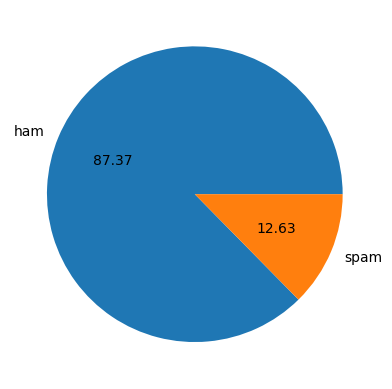

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
#data is imbalance

In [31]:
!pip install nltk

In [32]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
df['num_charachters']= df['text'].apply(len)

In [34]:
df.head()

,target,text,num_charachters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df.head()

,target,text,num_charachters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
 df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_charachters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
df[['num_charachters', 'num_words', 'num_sentences']].describe()

,num_charachters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
print(df.columns)


Index(['target', 'text', 'num_charachters', 'num_words', 'num_sentences'], dtype='object')


In [41]:
#ham
df[df['target']==0][['num_charachters', 'num_words', 'num_sentences']].describe()

,num_charachters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#spam
df[df['target']==1][['num_charachters', 'num_words', 'num_sentences']].describe()

,num_charachters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [43]:
import seaborn as sns

<Axes: xlabel='num_charachters', ylabel='Count'>

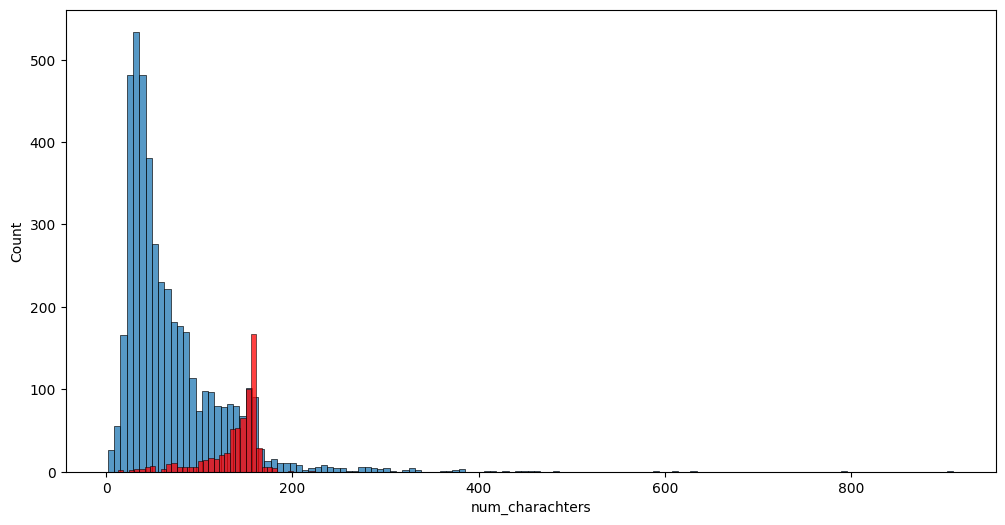

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charachters'])
sns.histplot(df[df['target']==1]['num_charachters'],color='red')

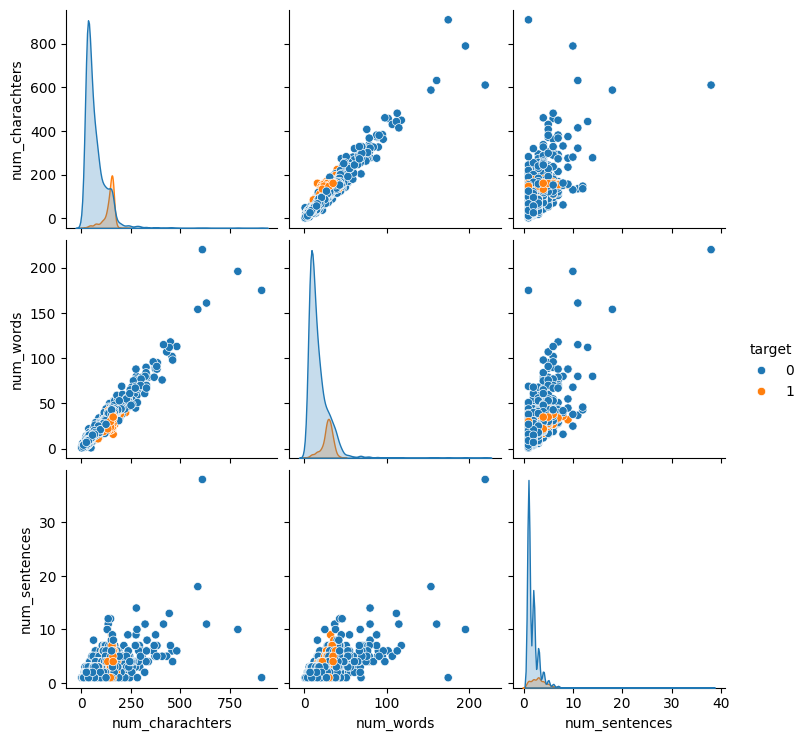

In [45]:
sns.pairplot(df,hue='target')

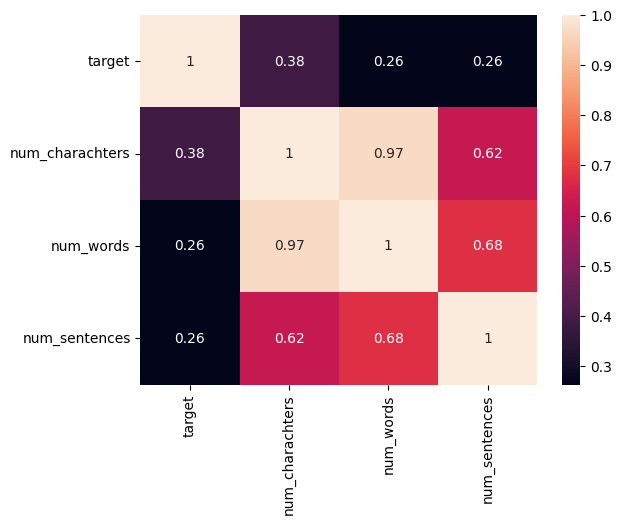

In [46]:


# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Show the plot
plt.show()


In [47]:
##3. data preprocessing
#a)lower case
#b)tokenization
#c)removing special characters
#d)removing stop words and punctuation
#e)stemming


In [48]:
import string
from nltk.corpus import stopwords


In [49]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.stem import PorterStemmer


In [51]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    y = []
    
    # Keep only alphanumeric words
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]  # Copy the list into text
    y.clear()  # Clear y list

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]  # Copy the list into text again
    y.clear()  # Clear y list again

    ps = PorterStemmer()  # Initialize the stemmer

    # Stem the words
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)  # Join the list into a single string and return

In [52]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [53]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('teaching')

'teach'

In [54]:
df['transformed_text']=df['text'].apply(transform_text)

In [55]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [56]:
df.head()

,target,text,num_charachters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
!pip install wordcloud

In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

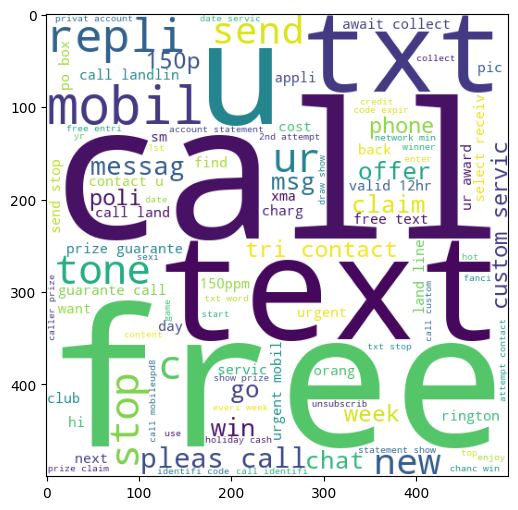

In [60]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

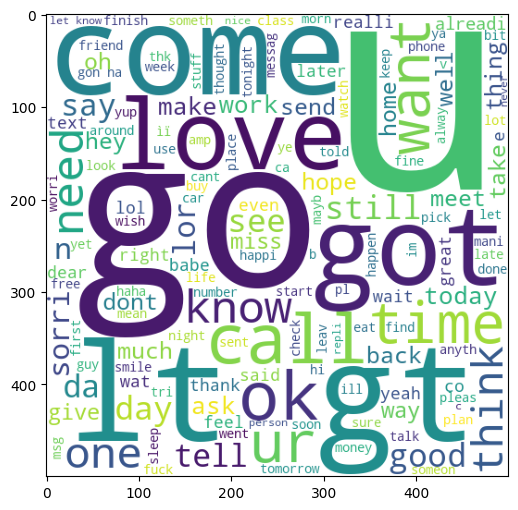

In [62]:
  plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [63]:
df.head()

,target,text,num_charachters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
spam_corpus = []

# Correct indexing to filter rows where target == 1
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [65]:
len(spam_corpus)

9939

In [66]:
from collections import Counter


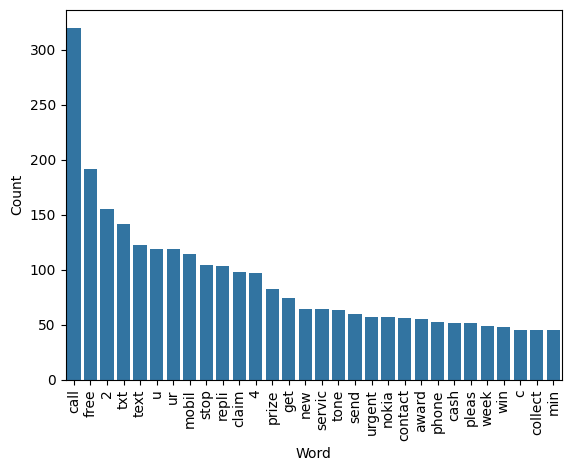

In [67]:
# Get the 30 most common words
word_counts = Counter(spam_corpus).most_common(30)

# Convert the result to a DataFrame
df_word_counts = pd.DataFrame(word_counts, columns=["Word", "Count"])

# Create the bar plot
sns.barplot(x="Word", y="Count", data=df_word_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [68]:
ham_corpus = []

# Correct indexing to filter rows where target == 0
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [69]:
len(ham_corpus)

35404

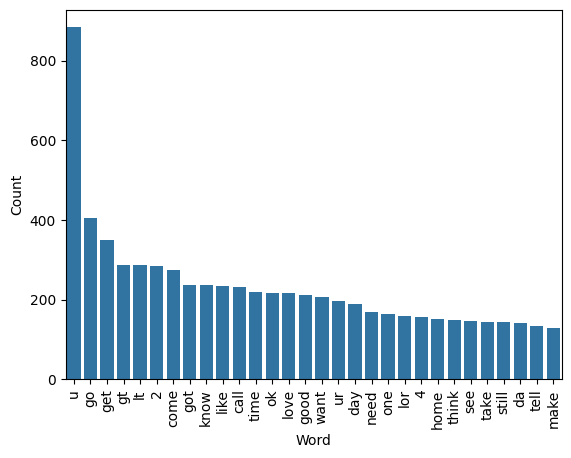

In [70]:
 # Get the 30 most common words
word_counts = Counter(ham_corpus).most_common(30)

# Convert the result to a DataFrame
df_word_counts = pd.DataFrame(word_counts, columns=["Word", "Count"])

# Create the bar plot
sns.barplot(x="Word", y="Count", data=df_word_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

##4.MODEL BUILDING

In [71]:
 from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [72]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [73]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix (input data)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Apply Min-Max scaling to X



In [74]:
X.shape

(5169, 3000)

In [75]:
y =df['target'].values

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [81]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)  
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [83]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [84]:
 bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [85]:
#tfidf ->  MNB

In [86]:
!pip install xgboost
!conda install -c conda-forge xgboost -y


'conda' is not recognized as an internal or external command,
operable program or batch file.


In [87]:
 # Import all necessary libraries at once
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [88]:
# Create objects (instances) of classifiers with specified parameters
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()  # Fixed typo (removed space between KNeighbors and Classifier)
mnb = MultinomialNB()  # Fixed typo (missing = sign)
dtc = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear', penalty='l2')  # Fixed typo (1 -> l in penalty)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [89]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lr,  # Fixed the typo from '1rc' to 'lr'
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,  # Fixed typo (removed extra space)
    'xgb': xgb
}


In [90]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
  
    clf.fit(X_train, y_train)
    
    
    y_pred = clf.predict(X_test)
    
  
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  

    return accuracy, precision


In [91]:
 train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [ ]:
 accuracy_scores = []
precision_scores = []

# Loop through the classifiers in the dictionary 'clfs'
for name, clf in clfs.items():
    # Call the train_classifier function
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    # Print the results for the current classifier
    print("For ", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)

    # Append the scores to their respective lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


In [ ]:

results_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Accuracy',ascending=False)



In [ ]:
 results_df

In [ ]:
 #model improve
#1.change the max_feature parameter of tfidf

In [ ]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [ ]:
temp_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [ ]:
new_df= results_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled

In [ ]:
import pickle

# Save the TF-IDF vectorizer to a file
pickle.dump(tfidf, open('Vectorizer.pkl', 'wb'))

# Save the model (e.g., Multinomial Naive Bayes) to a file
pickle.dump(mnb, open('model.pkl', 'wb'))
